In [4]:
#如何計算均線

import pandas as pd
s = pd.Series([1,2,3,4,5],index=['a','b','c','d','e'])
r = s.rolling(window=3)

s = r.mean()
print(s)

a    NaN
b    NaN
c    2.0
d    3.0
e    4.0
dtype: float64


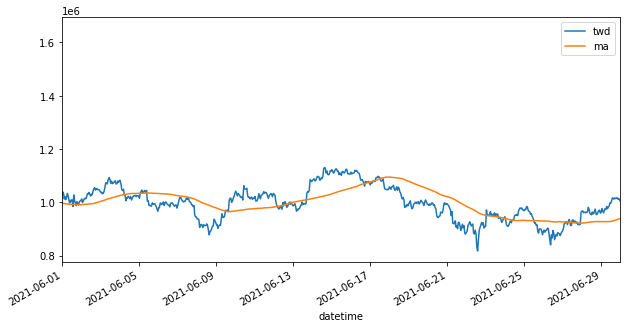

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


def get_price(url):
    data = requests.get(url)  # GET請求
    data_prices = data.json()['stats']  # 解析json格式，並取出'status'對應到的值
    df = pd.DataFrame(data_prices)  # 將list轉為dataframe
    df.columns = ['datetime', 'twd']  # 設定欄索引名稱
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')  # 將毫秒轉為時間日期格式
    df.index = df['datetime']  # 設定列索引
    return df


url = 'https://www.coingecko.com/price_charts/1/twd/90_days.json'
bitcoin = get_price(url)
# 利用'twd'欄位的值計算窗口為100的均線, 並加入bitcoin的dataframe之中
bitcoin['ma'] = bitcoin['twd'].rolling(window=100).mean()

# 以'twd'和'ma'欄位的值繪圖
bitcoin[['twd', 'ma']].plot(
    kind='line', figsize=[10, 5], xlim=('2021-06-01', '2021-06-30'))
plt.show()


In [6]:
import bitcoin_module as m

def strategy(df, total, ma_num, stop_earn):
    df['ma'] = df['twd'].rolling(window = ma_num).mean()
    df=df[ma_num-1:]   #將前面的none值去掉
    entry_price = 0   #進場點
    max_price = 0   #最高點
    min_price = 0   #最低點
    state='wait_long'   #設定初始狀態為'等待做多'
    for i in range(len(df)):
        #等待做多
        if state == 'wait_long':
            if df['twd'][i] > df['ma'][i]:
                max_price = df['twd'][i]
                entry_price = df['twd'][i]          
                state = 'entry_long'
                print(state,total)
        #等待做空
        elif state == 'wait_short':
            if df['twd'][i] < df['ma'][i]:
                min_price = df['twd'][i]
                entry_price = df['twd'][i]
                state = 'entry_short'
                print(state)
        #進場做多
        elif state == 'entry_long':
            if df['twd'][i] > max_price:
                max_price = df['twd'][i]
            if df['twd'][i] < max_price:
                total += df['twd'][i] - entry_price
                state = 'wait_short'
                print(state)
            elif df['twd'][i] - entry_price > stop_earn and stop_earn != 0:
                total += df['twd'][i] - entry_price
                state = 'wait_short'
                print(state)
        #進場做空
        elif state == 'entry_short':
            if df['twd'][i] < min_price:
                min_price = df['twd'][i]
            if df['twd'][i] > min_price:
                total += entry_price-df['twd'][i]
                state = 'wait_long'
                print(state)
            elif entry_price - df['twd'][i] > stop_earn and stop_earn != 0:
                total += entry_price - df['twd'][i]
                state = 'wait_long'
                print(state)
    return total

url = 'https://www.coingecko.com/price_charts/1/twd/90_days.json'
bitcoin =  m.get_price(url)
total = strategy(bitcoin, 1000000, 1430, 0)
#期初資金為100萬, 均線為200, 停利點為1000
print(total)  #顯示出淨值

entry_long 1000000
wait_short
entry_short
wait_long
entry_long 999646.3476258081
wait_short
1107362.4222967466


total= 1107362.4222967466  Best MA= 1430  Best stop earn 0


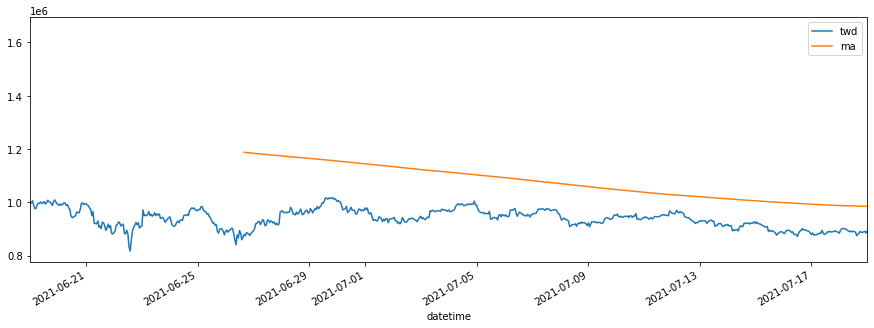

In [1]:
import bitcoin_module as m
import matplotlib.pyplot as plt

url = 'https://www.coingecko.com/price_charts/1/twd/90_days.json'
bitcoin = m.get_price(url)

total = 0
for i in range(0, 2000, 100):
    for j in range(0, 2000, 100):
        tmp_total = m.strategy(bitcoin, 1000000, i, j)
        if tmp_total > total:
            total = tmp_total  # 最佳淨值
            best_ma = i  # 最佳MA大小
            best_stop_earn = j  # 最佳停利點

for i in range(best_ma-100, best_ma+100, 10):
    for j in range(best_stop_earn-100, best_stop_earn+100, 10):
        tmp_total = m.strategy(bitcoin, 1000000, i, j)
        if tmp_total > total:
            total = tmp_total  # 最佳淨值
            best_ma = i  # 最佳MA大小
            best_stop_earn = j  # 最佳停利點

print("total=", total, " Best MA=", best_ma, " Best stop earn", best_stop_earn)
bitcoin['ma'] = bitcoin['twd'].rolling(window=best_ma).mean()
bitcoin[['twd', 'ma']].plot(
    kind='line', figsize=[15, 5], xlim=('2021-06-19', '2021-07-19'))
plt.show()


In [ ]:





#------------------------------------------------------------





In [7]:
import cv2
import time
cv2.namedWindow('Frame',cv2.WINDOW_FULLSCREEN)
time.sleep(3)
cv2.destroyWindow('Frame')

In [8]:
import cv2
try:
    img = cv2.imread('car.jpg')             # 讀取圖片
    img_small = cv2.resize(img, (300, 100))  # 改變尺寸
    cv2.imshow('Frame1', img)               # 顯示原圖
    cv2.imshow('Frame2', img_small)         # 顯示新圖
    cv2.waitKey(0)                          # 等待
    cv2.destroyAllWindows()                 # 關閉視窗
    try:
        cv2.imwrite('small.jpg', img_small)  # 儲存影像
        print('saved')
    except:
        print('Error：write')
except:
    print('Error：read')


saved


In [9]:
import cv2  # 匯入 cv2 套件

capture = cv2.VideoCapture(0)   # 建立攝影機物件
if capture.isOpened():
    while True:
        sucess, img = capture.read()        # 讀取影像
        if sucess:
            cv2.imshow('Frame', img)        # 顯示影像
        k = cv2.waitKey(100)                # 等待按鍵輸入
        if k == ord('s') or k == ord('S'):  # 按下 S(s)
            cv2.imwrite('shot.jpg', img)    # 儲存影像
            print('儲存影像')

        if k == ord('q') or k == ord('Q'):  # 按下 Q(q) 結束迴圈
            print('exit')
            cv2.destroyAllWindows()         # 關閉視窗
            capture.release()               # 關閉攝影機
            break
else:
    print('開啟攝影機失敗')


儲存影像
exit


In [11]:
import requests
import cv2
import time
import re

base = 'https://japanwest.api.cognitive.microsoft.com/vision/v3.1/read/analyze?%'
recog_url = f'{base}/recognizeText?mode=Printed'
key = 'dde0635579644ea2aac2163565ad71be'
# 查看結果的請求標頭
headers = {'Ocp-Apim-Subscription-Key': key}
headers_stream = {'Ocp-Apim-Subscription-Key': key,                     # 辨識的請求標頭
                  'Content-Type': 'application/octet-stream'}


def get_license(img):
    # 將 img 編碼為 jpg 格式，[1]返回資料, [0]返回是否成功
    img_encode = cv2.imencode('.jpg', img)[1]
    img_bytes = img_encode.tobytes()                # 再將資料轉為 bytes, 此即為要傳送的資料
    r1 = requests.post(recog_url,            # 發出 POST
                       headers=headers_stream,
                       data=img_bytes)
    if r1.status_code != 202:                # 202 代表接受請求
        print(r1.json())
        return '請求失敗'
    #--↓↓辨識請求成功↓↓--#
    result_url = r1.headers['Operation-Location']  # 取得查看結果的請求路徑
    r2 = requests.get(result_url, headers=headers)  # 發出 GET 請求
    while r2.status_code == 200 and r2.json()['status'] != 'succeeded':
        r2 = requests.get(result_url, headers=headers)    # 繼續發出 GET
        time.sleep(0.5)
        print('status: ', r2.json()['status'])      # 顯示辨識狀態

    #--↓↓辨識完成↓↓--#
    carcard = ''  # 紀錄車牌
    lines = r2.json()['analyzeResult']['readResults'][0]['lines']
    for i in range(len(lines)):
        text = lines[i]['text']  # 取得辨識文字
        m = re.match(r'^[\w]{2,4}[-. ][\w]{2,4}$', text)    # 匹配是否為車牌格式
        if m != None:   # 匹配成功
            carcard = m.group()
            return carcard
    if carcard == '':   # 無匹配結果
        return '找不到車牌'

#----------------------------------------------------------#


try:
    img = cv2.imread('car.jpg')  # 讀取圖片
    print('status:  Start')
    text = get_license(img)     # 辨識圖片中的車牌
    print('車牌：', text)
    cv2.imshow('Frame', img)    # 顯示圖片
    cv2.waitKey(0)              # 等待
    cv2.destroyAllWindows()     # 關閉視窗
except:
    print('讀取圖片失敗')


status:  Start
status:  succeeded
車牌： 9C.9508


In [13]:
import cv2
import requests
import time
import re

base = 'https://japanwest.api.cognitive.microsoft.com/vision/v3.1/read/analyze?%'
recog_url = f'{base}/recognizeText?mode=Printed'
key = 'dde0635579644ea2aac2163565ad71be'  # 您的金鑰
# 查看結果的請求標頭
headers = {'Ocp-Apim-Subscription-Key': key}
headers_stream = {'Ocp-Apim-Subscription-Key': key,                     # 辨識的請求標頭
                  'Content-Type': 'application/octet-stream'}


def get_license(img):
    # 將 img 編碼為 JPEG 格式，[1]返回資料, [0]返回是否成功
    img_encode = cv2.imencode('.jpg', img)[1]
    img_bytes = img_encode.tobytes()                # 再將資料轉為 bytes, 此即為要傳送的資料
    r1 = requests.post(recog_url,            # 發出 POST
                       headers=headers_stream,
                       data=img_bytes)
    if r1.status_code != 202:                # 202 代表接受請求
        print(r1.json())
        return '請求失敗'
    #--↓↓辨識請求成功↓↓--#
    result_url = r1.headers['Operation-Location']  # 取得查看結果的請求路徑
    r2 = requests.get(result_url, headers=headers)  # 發出 GET 請求
    while r2.status_code == 200 and r2.json()['status'] != 'succeeded':
        r2 = requests.get(result_url, headers=headers)    # 繼續發出 GET
        time.sleep(0.5)
        print('status: ', r2.json()['status'])      # 顯示辨識狀態
    #--↓↓辨識完成↓↓--#
    carcard = ''  # 紀錄車牌
    lines = r2.json()['analyzeResult']['readResults'][0]['lines']
    for i in range(len(lines)):
        text = lines[i]['text']  # 取得辨識文字
        m = re.match(r'^[\w]{2,4}[-. ][\w]{2,4}$', text)    # 匹配是否為車牌格式
        if m != None:   # 匹配成功
            carcard = m.group()
            return carcard
    if carcard == '':   # 無匹配結果
        return '找不到車牌'
#-------------------------------------------------------------------------------------------
    
    
capture = cv2.VideoCapture(0)   # 建立攝影機物件
if capture.isOpened():
    while True:
        sucess, img = capture.read()        # 讀取影像
        if sucess:
            cv2.imshow('Frame', img)        # 顯示影像
        k = cv2.waitKey(100)                # 等待按鍵輸入
        if k == ord('s') or k == ord('S'):  # 按下 S(s)
            cv2.imwrite('shot.jpg', img)    # 儲存影像
            text = get_license(img)         # 進行車牌辨識
            print('車牌:', text)

        if k == ord('q') or k == ord('Q'):  # 按下 Q(q) 結束迴圈
            print('exit')
            cv2.destroyAllWindows()         # 關閉視窗
            capture.release()               # 關閉攝影機
            break
else:
    print('開啟攝影機失敗')


status:  running
status:  succeeded
車牌: 9C.9508
exit
